# Preprocessing
understanding data

EDA plots

feature engineering


In [5]:
import pandas as pd

train = pd.read_excel("train(1).xlsx")
test  = pd.read_excel("test2.xlsx")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


Train shape: (16209, 21)
Test shape: (5404, 20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [6]:
train.info()
train.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


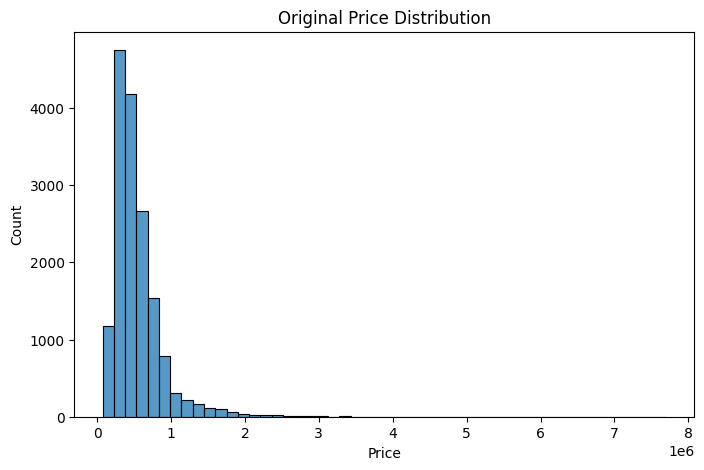

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(train['price'], bins=50)
plt.title("Original Price Distribution")
plt.xlabel("Price")
plt.show()


In [8]:
train['price'].skew()


np.float64(4.033062347507748)

In [9]:
import numpy as np

train['log_price'] = np.log1p(train['price'])


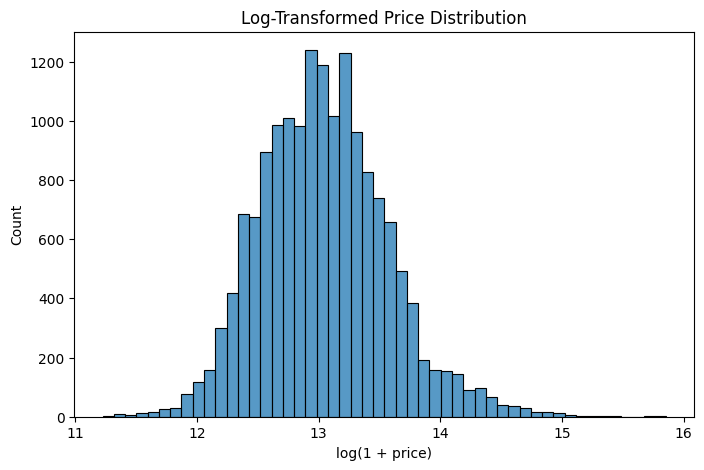

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(train['log_price'], bins=50)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(1 + price)")
plt.show()


In [11]:
price_cap = train['price'].quantile(0.99)
train = train[train['price'] <= price_cap].reset_index(drop=True)


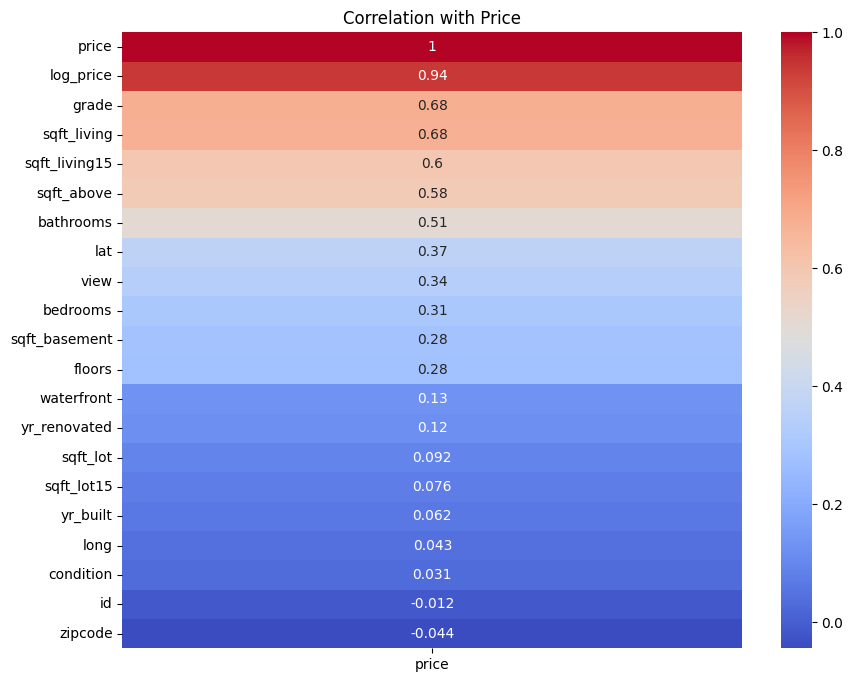

In [12]:
corr = train.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(
    corr[['price']].sort_values(by='price', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation with Price")
plt.show()


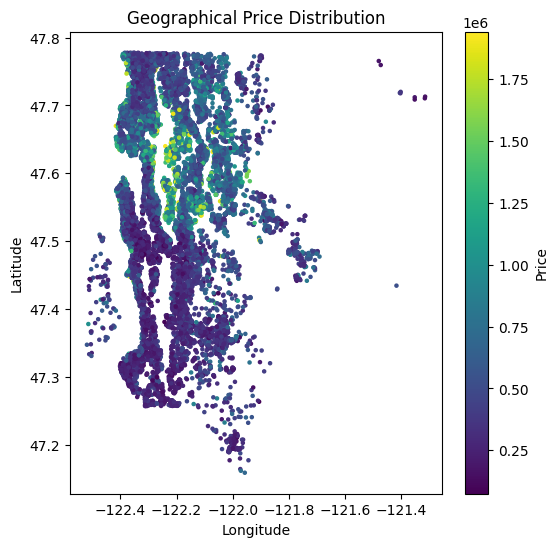

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(
    train['long'], train['lat'],
    c=train['price'],
    cmap='viridis',
    s=5
)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Price Distribution")
plt.show()


In [14]:
train.drop(columns=['sqft_above','sqft_basement'], inplace=True)
test.drop(columns=['sqft_above','sqft_basement'], inplace=True)


In [15]:
CURRENT_YEAR = 2025

train['house_age'] = CURRENT_YEAR - train['yr_built']
test['house_age']  = CURRENT_YEAR - test['yr_built']


In [16]:
train['was_renovated'] = (train['yr_renovated'] > 0).astype(int)
test['was_renovated']  = (test['yr_renovated'] > 0).astype(int)

train.drop(columns=['yr_renovated'], inplace=True)
test.drop(columns=['yr_renovated'], inplace=True)


In [17]:
train['rel_living'] = train['sqft_living'] / train['sqft_living15']
test['rel_living']  = test['sqft_living'] / test['sqft_living15']

train['rel_lot'] = train['sqft_lot'] / train['sqft_lot15']
test['rel_lot']  = test['sqft_lot'] / test['sqft_lot15']


In [18]:
train['lot_utilization'] = train['sqft_living'] / train['sqft_lot']
test['lot_utilization']  = test['sqft_living'] / test['sqft_lot']


In [19]:
train['bath_bed_ratio'] = train['bathrooms'] / (train['bedrooms'] + 1)
test['bath_bed_ratio']  = test['bathrooms'] / (test['bedrooms'] + 1)


In [20]:
train['is_luxury'] = (
    (train['grade'] >= 10) |
    (train['waterfront'] == 1) |
    (train['view'] >= 3)
).astype(int)

test['is_luxury'] = (
    (test['grade'] >= 10) |
    (test['waterfront'] == 1) |
    (test['view'] >= 3)
).astype(int)


In [21]:
from sklearn.model_selection import train_test_split

# Drop non-feature columns
DROP_COLS = ['price', 'log_price', 'date']

X = train.drop(columns=DROP_COLS)
y = train['log_price']

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_val.shape


((12836, 23), (3210, 23))

# Model training
Baseline models

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_val)

lr_rmse = np.sqrt(mean_squared_error(y_val, lr_pred))
lr_r2   = r2_score(y_val, lr_pred)

lr_rmse, lr_r2


(np.float64(0.24200602448228087), 0.7692878177775375)

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_val)

ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_pred))
ridge_r2   = r2_score(y_val, ridge_pred)

ridge_rmse, ridge_r2


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.37383e-24): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


(np.float64(0.2419925916821841), 0.769313428913629)

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_val)

lasso_rmse = np.sqrt(mean_squared_error(y_val, lasso_pred))
lasso_r2   = r2_score(y_val, lasso_pred)

lasso_rmse, lasso_r2


(np.float64(0.24249294016098635), 0.7683584988456358)

In [25]:
import pandas as pd

baseline_results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'RMSE': [lr_rmse, ridge_rmse, lasso_rmse],
    'R2':   [lr_r2, ridge_r2, lasso_r2]
})

baseline_results


,Model,RMSE,R2
0,Linear,0.242006,0.769288
1,Ridge,0.241993,0.769313
2,Lasso,0.242493,0.768358


In [26]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [27]:
xgb_pred = xgb_model.predict(X_val)

xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
xgb_r2   = r2_score(y_val, xgb_pred)

xgb_rmse, xgb_r2


(np.float64(0.15919791178165088), 0.9001626820075301)

In [28]:
final_tabular_results = pd.concat([
    baseline_results,
    pd.DataFrame({
        'Model': ['XGBoost'],
        'RMSE': [xgb_rmse],
        'R2':   [xgb_r2]
    })
], ignore_index=True)

final_tabular_results


,Model,RMSE,R2
0,Linear,0.242006,0.769288
1,Ridge,0.241993,0.769313
2,Lasso,0.242493,0.768358
3,XGBoost,0.159198,0.900163


In [29]:
normalized_rmse = xgb_rmse / y_val.std()
normalized_rmse


np.float64(0.3159212180659091)

# Data Fetcher
Download satellite images

In [30]:
import os

TRAIN_IMG_DIR = "satellite_images/train"
TEST_IMG_DIR  = "satellite_images/test"

os.makedirs(TRAIN_IMG_DIR, exist_ok=True)
os.makedirs(TEST_IMG_DIR, exist_ok=True)


In [31]:
MAPBOX_TOKEN = "pk.eyJ1IjoiYmhvb21paWlpaWlpIiwiYSI6ImNtazQ3dmZrNTAyb3YzZHIxYTRlcWZqeHAifQ.1uEqbI9rWPG2qL3_AeEFTw"


In [32]:
import requests
from PIL import Image
from io import BytesIO

def fetch_mapbox_satellite(lat, lon, save_path, zoom=18, size=400):
    url = (
        f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
        f"{lon},{lat},{zoom}/"
        f"{size}x{size}"
        f"?access_token={MAPBOX_TOKEN}"
    )

    response = requests.get(url)

    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.save(save_path)
        return True
    else:
        print("Failed:", response.status_code)
        return False


In [33]:
test_lat = train.iloc[0]["lat"]
test_lon = train.iloc[0]["long"]

test_path = os.path.join(TRAIN_IMG_DIR, "test.png")

success = fetch_mapbox_satellite(test_lat, test_lon, test_path)
success, os.path.exists(test_path)


(True, True)

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

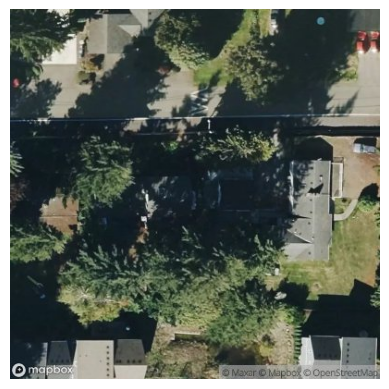

In [34]:
from matplotlib import pyplot as plt

img = Image.open(test_path)
plt.imshow(img)
plt.axis("off")


In [35]:
from tqdm import tqdm

downloaded = 0

for idx, row in tqdm(train.head(1000).iterrows(), total=1000):
    img_path = os.path.join(TRAIN_IMG_DIR, f"{idx}.png")

    if os.path.exists(img_path):
        continue

    try:
        ok = fetch_mapbox_satellite(row["lat"], row["long"], img_path)
        if ok:
            downloaded += 1
    except Exception as e:
        print(f"Failed at index {idx}: {e}")

print("Downloaded train images:", downloaded)


100%|██████████| 1000/1000 [10:09<00:00,  1.64it/s]

Downloaded train images: 1000


#Model Training
CNN

PCA

Fusion

Evaluation

Generating final csv

In [36]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
from tqdm import tqdm


In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"

resnet = models.resnet50(pretrained=True)

# Remove final classification layer
resnet.fc = torch.nn.Identity()

resnet = resnet.to(device)
resnet.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 223MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [38]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [39]:
def extract_image_features(img_path):
    img = Image.open(img_path).convert("RGB")
    img = preprocess(img).unsqueeze(0).to(device)

    with torch.no_grad():
        features = resnet(img)

    return features.cpu().numpy().flatten()


In [41]:
train_image_files = sorted(
    f for f in os.listdir(TRAIN_IMG_DIR) if f.endswith(".png")
)

image_features = []
valid_indices = []

for fname in tqdm(train_image_files):
    name = fname.replace(".png", "")

    # ✅ Skip files that are not numeric (e.g., test.png)
    if not name.isdigit():
        continue

    idx = int(name)
    img_path = os.path.join(TRAIN_IMG_DIR, fname)

    try:
        feats = extract_image_features(img_path)
        image_features.append(feats)
        valid_indices.append(idx)
    except Exception as e:
        print(f"Skipping {fname}: {e}")

image_features = np.vstack(image_features)


100%|██████████| 1001/1001 [00:18<00:00, 52.78it/s]


In [42]:
image_features.shape, len(valid_indices)


((1000, 2048), 1000)

In [43]:
X_tabular_aligned = X.iloc[valid_indices].values
y_aligned = y.iloc[valid_indices].values


In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128, random_state=42)
image_features_pca = pca.fit_transform(image_features)


In [45]:
X_tabular_aligned = X.iloc[valid_indices].values
y_aligned = y.iloc[valid_indices].values


In [46]:
import numpy as np

X_multimodal = np.hstack([
    X_tabular_aligned,
    image_features_pca
])

X_multimodal.shape


(1000, 151)

In [47]:
from sklearn.model_selection import train_test_split

X_mm_train, X_mm_val, y_mm_train, y_mm_val = train_test_split(
    X_multimodal,
    y_aligned,
    test_size=0.2,
    random_state=42
)


In [48]:
import xgboost as xgb

mm_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

mm_model.fit(X_mm_train, y_mm_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

mm_preds = mm_model.predict(X_mm_val)

mm_rmse = np.sqrt(mean_squared_error(y_mm_val, mm_preds))
mm_r2 = r2_score(y_mm_val, mm_preds)

mm_rmse, mm_r2


(np.float64(0.21816762885785693), 0.7904396776412437)

In [50]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "XGBoost (Tabular)",
        "XGBoost (Multimodal)"
    ],
    "RMSE (log)": [
        0.242006,
        0.241993,
        0.242493,
        0.159198,
        mm_rmse
    ],
    "R2": [
        0.769288,
        0.769313,
        0.768358,
        0.900163,
        mm_r2
    ]
})

results


,Model,RMSE (log),R2
0,Linear Regression,0.242006,0.769288
1,Ridge Regression,0.241993,0.769313
2,Lasso Regression,0.242493,0.768358
3,XGBoost (Tabular),0.159198,0.900163
4,XGBoost (Multimodal),0.218168,0.790440


In [51]:
importances = mm_model.feature_importances_

tabular_importance = importances[:X_tabular_aligned.shape[1]].sum()
image_importance = importances[X_tabular_aligned.shape[1]:].sum()

tabular_importance, image_importance


(np.float32(0.6091603), np.float32(0.39083976))

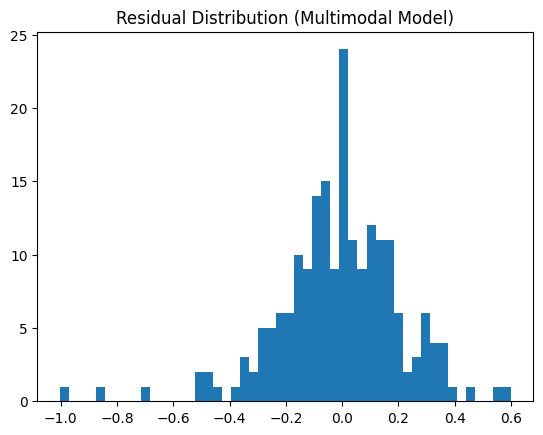

In [52]:
residuals = y_mm_val - mm_preds

import matplotlib.pyplot as plt

plt.hist(residuals, bins=50)
plt.title("Residual Distribution (Multimodal Model)")
plt.show()


In [53]:
final_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_multimodal, y_aligned)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [54]:
# Target
y = train["log_price"]

# Features (same columns for train & test)
X_train = train.drop(columns=["price", "log_price"])
X_test  = test[X_train.columns]  # ensure same order


In [56]:
X_train.dtypes[X_train.dtypes == "object"]


,0
date,object


In [57]:
for df in [train, test]:
    if "date" in df.columns:
        df.drop(columns=["date"], inplace=True)


In [58]:
for df in [train, test]:
    if "zipcode" in df.columns:
        df["zipcode"] = df["zipcode"].astype(int)


In [59]:
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test  = X_test.apply(pd.to_numeric, errors="coerce")


In [60]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [61]:
X_train.dtypes.unique()


array([dtype('int64'), dtype('float64')], dtype=object)

In [62]:
import xgboost as xgb

final_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [63]:
log_preds = final_model.predict(X_test)
price_preds = np.expm1(log_preds)

submission = pd.DataFrame({
    "id": test["id"],
    "predicted_price": price_preds
})

submission.to_csv("predictions.csv", index=False)
